In [230]:
# ===================================================================
# Programm for creating word cloud of top-50 words from news with 'Russia' tag
# Articles will be taken from  Google News US over the past month (30d)
# ===================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

from datetime import datetime, timedelta
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

API_key='be4fbfb3d42750031a6b4ac80332d442'
assert (API_key != '?'),"You need your own API key from gnews.io! Or you can use preloaded data from my GitHub. Just skip the next 3 steps and uncomment code block"

In [231]:
# Functions for creating news data

def get_articles(start_d_str, end_d_str):
    """Return top-100 news for enteres time period"""
    
    url='https://gnews.io/api/v3/search?q=Russia&lang=en&country=us&mindate='\
    +str(start_d_str)+'&maxdate='+str(end_d_str)+'&token='+API_key
    
    articles_re = requests.get(url).json()
    
    articles_df=pd.DataFrame(articles_re)
    articles_df = pd.concat([articles_df.drop(['articles'], axis=1), 
                               articles_df['articles'].apply(pd.Series)], axis=1)
    articles_df = articles_df.drop(columns=['timestamp','articleCount','url','image','publishedAt','source'])
                  
    return articles_df

                                   
def daterange(start_date, end_date):
    """Function that we will use for iterating over the time period"""
    
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [232]:
# Using get_articles func will get top-10 news 
# for every day of 30d period

# getting list of columns name for creating empty DataFrame
columns_list=list((get_articles((datetime.now()-timedelta(days=1)).strftime("%Y-%m-%d"),
             (datetime.now()).strftime("%Y-%m-%d"))).columns) # columns_list=['title','description']
d30_articles_df=pd.DataFrame(columns=columns_list)


for single_date in daterange(datetime.now()-timedelta(days=30), 
                             datetime.now()):
    d30_articles_df=d30_articles_df.append(get_articles((single_date-timedelta(days=1)).strftime("%Y-%m-%d"), 
                                        single_date.strftime("%Y-%m-%d")))
print(d30_articles_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 9
Data columns (total 2 columns):
title          279 non-null object
description    279 non-null object
dtypes: object(2)
memory usage: 6.5+ KB
None


In [234]:
# Save our data set so as not to lose it
d30_articles_df.to_csv("d30_articles.csv")
df_saved=d30_articles_df

In [228]:
# UNCOMMENT THIS IF YOU HAVE NO YOUR OWN API KEY
# --------------------->

# df_saved=pd.read_csv('https://raw.githubusercontent.com/DaniilChubanov/alpha/master/wordcloud_russia_gnews/30d_articles_russia_Gnews.csv', index_col=0)

# print(df_saved.head(4))
# print(df_saved.info())

In [235]:
# Preparing text for wordcloud
text_desc=str([entry for entry in df_saved.description if pd.isna(entry)==False])
text_title=str(df_saved.title.to_list())
text=text_desc+text_title

# Path for png image that will be our wordcloud mask
png_path='https://raw.githubusercontent.com/DaniilChubanov/alpha/master/wordcloud_russia_gnews/wordcloud_mask_russia.png'

# Setting up stopwords - words that will be not included in our wordcloud
stopwords = set(STOPWORDS)
stopwords.update(["Russia'", "Report", "Making", "requested", 'Sept',
                  'taking','report','review', 'alleges', "Russian", 
                  "two",'will','one','say', 'says'])

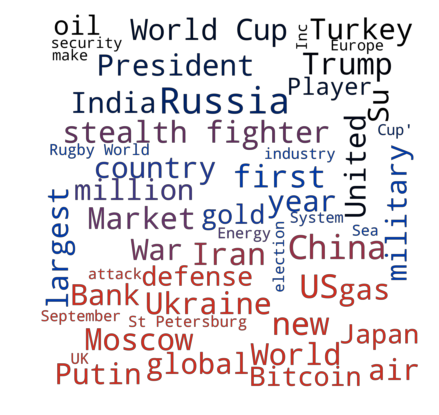

In [238]:
# Creating our wordcloud and showing it
# rerun this block for different results
wordcloud = WordCloud(stopwords=stopwords ,relative_scaling=0.1, font_step=5,mode="RGBA",background_color=None, contour_color='black',max_words=50, mask=mask).generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig('ru_wordcloud.png', format="png")

plt.show()